In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("D:\\disk d\\SEM-7\\training\\TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df=pd.DataFrame(data,columns=['Date','Close'])
df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [4]:
df.isna().values.any()

False

In [5]:
data.shape

(2416, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


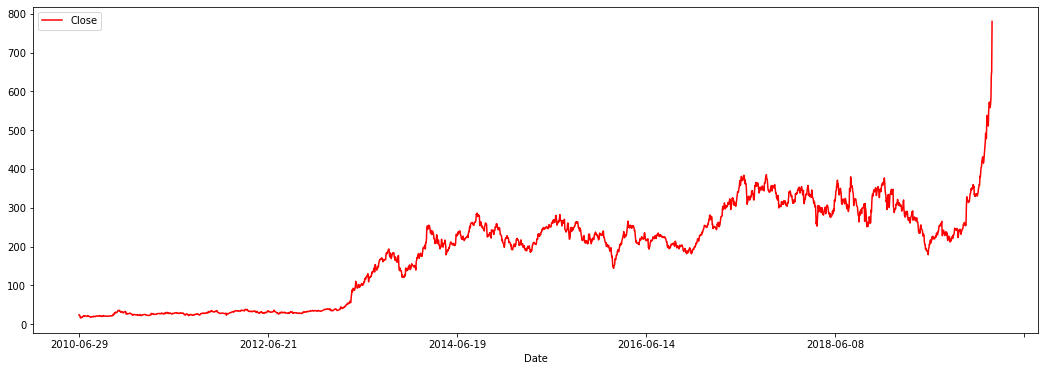

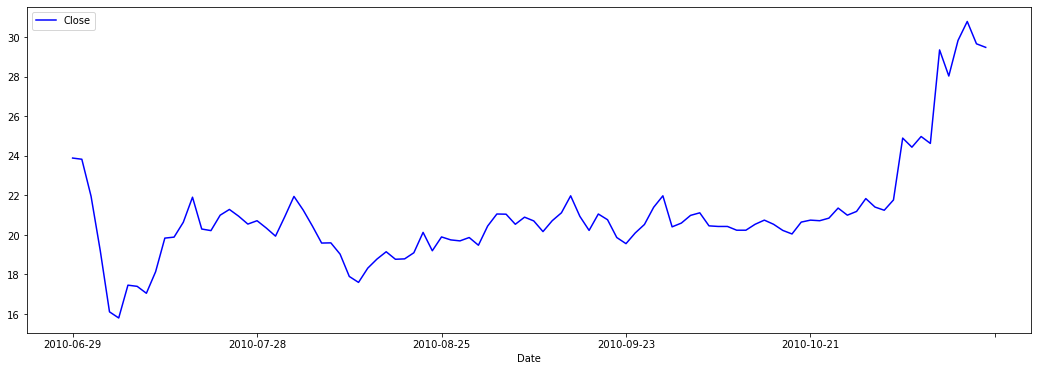

In [8]:
plt.rcParams['figure.figsize']=(18,6)
data.plot('Date','Close',color='red')
new_data=data.head(100)
new_data.plot('Date','Close',color='blue')
plt.show()

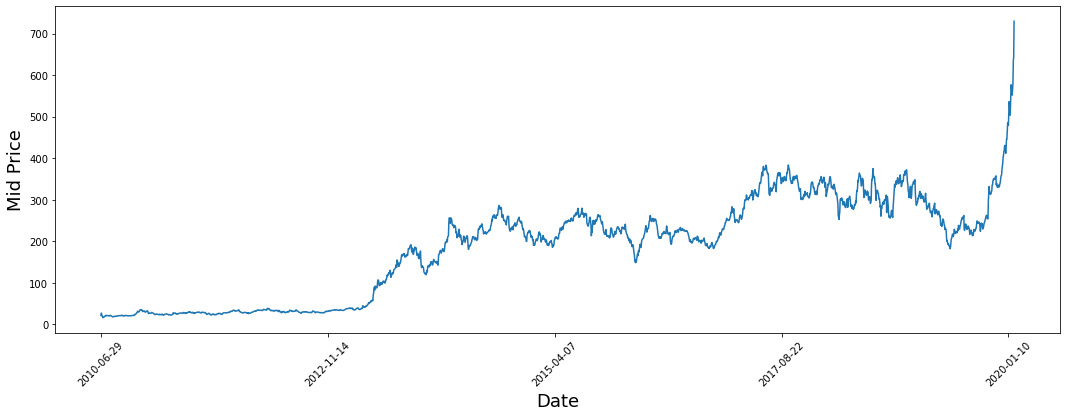

In [9]:
plt.rcParams['figure.figsize']=(18,6)
plt.plot(range(data.shape[0]),(data['High']+data['Low'])/2.0)
plt.xticks(range(0,data.shape[0],600),data['Date'].loc[::600],rotation=45)
plt.xlabel('Date',fontsize='18')
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=0)

In [11]:
train.index.shape

(1932,)

In [12]:
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1) #features
print(X_train.shape)
y_train = train['Close'] #target

(1932, 1)


In [13]:
X_train.shape

(1932, 1)

In [14]:
model=LinearRegression() #model creation
model.fit(X_train,y_train) #training the model

LinearRegression()

In [15]:
print("Slope",model.coef_)#means with 1 unit increase in the date the closing price increases by 0.17$
print("Intercept",model.intercept_)

Slope [0.15276057]
Intercept 2.36746266026708


In [16]:
pred=model.predict(X_train)
print(pred)

[173.76481802 113.42439434 246.93712927 ... 118.92377473 129.9225355
 254.88067872]


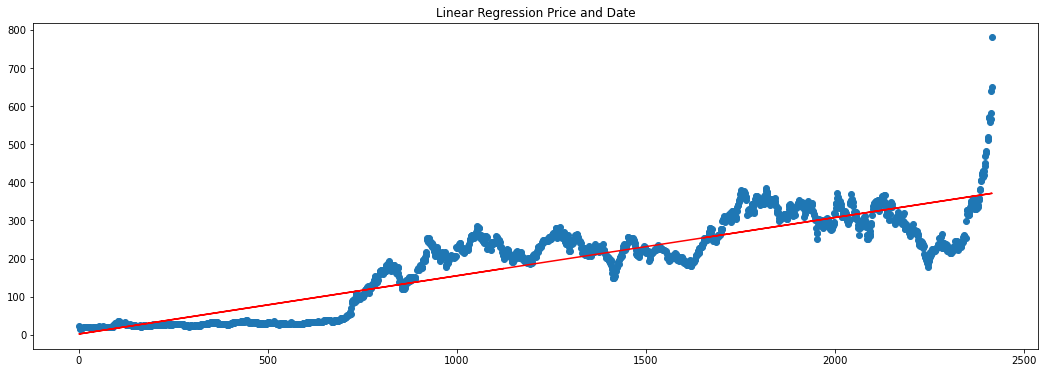

In [17]:
plt.rcParams['figure.figsize']=(18,6)
plt.title('Linear Regression Price and Date')
plt.scatter(X_train,y_train,label='Actual Price')
plt.plot(X_train,pred,color='r',label='Predicted Price')
plt.show()

In [18]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_pred = model.predict(X_test)

In [19]:
df.shape

(2416, 2)

In [20]:
df_sample=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':y_pred,'Error':(y_test-y_pred)}).head(20)
df_sample

,Date,Actual,Prediction,Error
966,2014-05-01,207.729996,149.934170,57.795826
557,2012-09-12,28.280001,87.455098,-59.175097
148,2011-01-28,24.010000,24.976026,-0.966026
1917,2018-02-08,315.230011,295.209468,20.020543
1585,2016-10-13,200.240005,244.492960,-44.252955
985,2014-05-29,210.240005,152.836620,57.403385
215,2011-05-05,26.440001,35.210984,-8.770983
390,2012-01-13,22.790001,61.944084,-39.154083
1299,2015-08-26,224.839996,200.803438,24.036558
1806,2017-08-30,353.179993,278.253045,74.926948


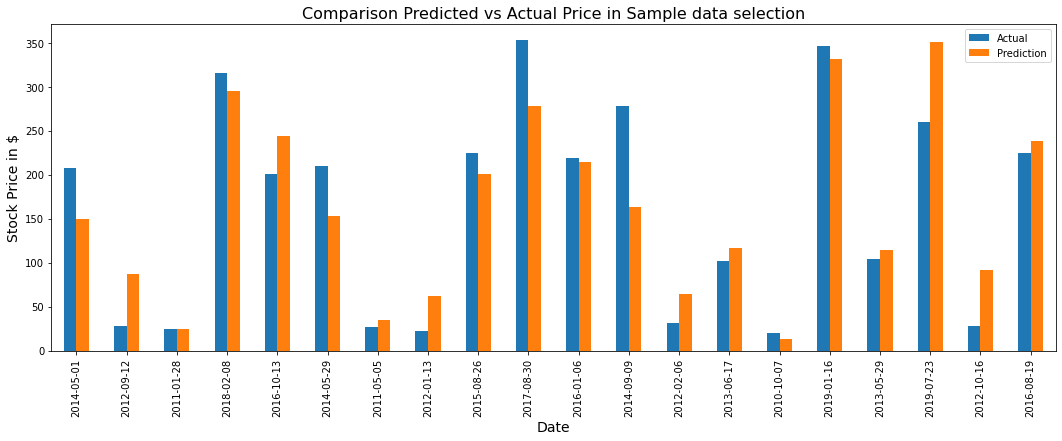

In [21]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Actual', 'Prediction'], kind='bar', ax=ax)
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

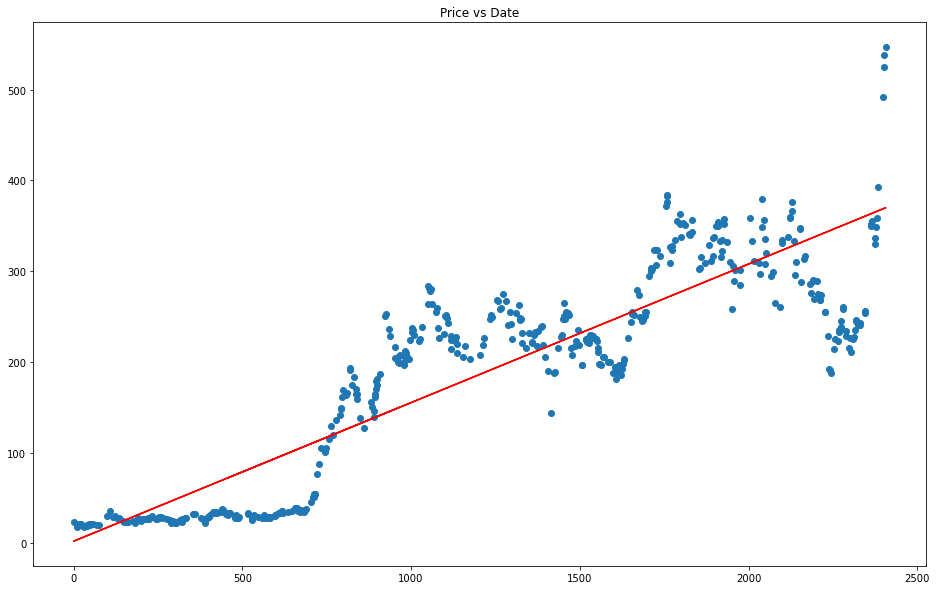

In [22]:
plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')

In [23]:
from sklearn.metrics import explained_variance_score
#It shows that how much variation in Y is explained by the variable X. 
#For example if your r-squared is 0.86, it says that 86% of the variation in Y can be explained by X,
#while the rest is explained by some other variables not included in the model. 
#Its used as a measure of goodness of fit of the model.
explained_variance_score(y_test, y_pred)

0.7823533344624387

In [24]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [25]:
pred2=regressor.predict(X_test)
print(pred2)

[209.15600071  28.21559931  24.64860002 334.70480365 199.86509656
 208.36500421  26.82640099  28.17820004 228.52660061 349.03818828
 220.14759513 281.05709407  31.2034     101.31379978  20.61710025
 337.51809627 107.78750066 256.89059668  27.56180022 223.37269595
 358.87780175 323.10520118 224.10230122 335.22709294 301.25119557
 187.28369945 333.45839843 270.90679961 225.49950059 247.4137018
  26.76900013  31.53589937  29.74160058 222.40370211 386.43479579
 213.00939772 210.74759793 142.10269764 321.42961111 217.97300032
 310.40180505  36.35559903  24.05499996 219.89079674  28.54899971
 232.15679492 201.5905026   34.08340114 324.50568819 267.75880655
 236.57570058 302.17751052  36.64359916 217.08679901 284.51519379
 224.16579776  33.57900025 237.77389859  17.13999929  50.05729946
 229.70719919  33.89970115 258.83250619 327.40809408  27.9244994
  28.08340048 241.92899812 229.32169725  20.3998001   33.33679976
  33.35199993 170.73739888 322.19270498  23.52949973  33.28199937
 304.4104078

In [26]:
df_sample2=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':pred2,'Error':(y_test-pred2)}).head(20)
df_sample2

,Date,Actual,Prediction,Error
966,2014-05-01,207.729996,209.156001,-1.426005
557,2012-09-12,28.280001,28.215599,0.064402
148,2011-01-28,24.010000,24.648600,-0.638600
1917,2018-02-08,315.230011,334.704804,-19.474793
1585,2016-10-13,200.240005,199.865097,0.374908
985,2014-05-29,210.240005,208.365004,1.875001
215,2011-05-05,26.440001,26.826401,-0.386400
390,2012-01-13,22.790001,28.178200,-5.388199
1299,2015-08-26,224.839996,228.526601,-3.686605
1806,2017-08-30,353.179993,349.038188,4.141805


In [27]:
explained_variance_score(y_test, pred2)

0.9971168687845406